# Análisis de Supuestos

Cuando se realiza una regresión lineal, se asume que los datos cumplen ciertos supuestos. Si estos supuestos no se cumplen, los resultados del modelo pueden no ser válidos. A continuación damos una explicación de cada uno de estos supuestos y cómo se verifican:

Primero carguemos los datos a utilizar y el modelo, con igual valor de variables del archivo de regresion lineal. 

Variables independientes : `MaxSpeed`,`Age`,`FinalPosition`,`Points`,`Overtakes`,`TyreWear`,`WeatherCondition_Mixed`,`TrackGrip_Low`

Variable a predecir (dependiente): `FinalRaceTime`

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the data
data = pd.read_csv("formula1_interlagos_df_final.csv")

# Select relevant features and target
features = ['MaxSpeed', 'Age', 'FinalPosition', 'Points', 'Overtakes', 'TyreWear', 'WeatherCondition_Mixed', 'TrackGrip_Low']
target = 'FinalRaceTime'

circuit_data = data[data['Circuit'] == "Melbourne"].copy()

X = circuit_data[features]
y = circuit_data[target]

    # Handle missing values
X = X.dropna()
y = y[X.index]



    # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    # Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_
intercept = model.intercept_

#print("\nEquation of the hyperplane:")
equation = f"FinalRaceTime = {intercept:.2f}"
for feature, coef in zip(features, coefficients):
    equation += f" + ({coef:.2f} * {feature})"
print(equation)

# Calculate R-squared
r_squared = model.score(X_test_scaled, y_test)




print(f"{r_squared:.4f}")



FinalRaceTime = 267.70 + (-3.85 * MaxSpeed) + (-2.59 * Age) + (13.95 * FinalPosition) + (8.88 * Points) + (-2.78 * Overtakes) + (-5.28 * TyreWear) + (4.24 * WeatherCondition_Mixed) + (4.50 * TrackGrip_Low)
0.3565


## Media de Errores a Cero y la Suma de los Errores es Cero

Supuesto que se deriva del método de Mínimos Cuadrados Ordinarios (OLS).
La media de los residuos (errores) debe ser aproximadamente cero.La suma de los errores también debe ser cero o muy cercana a cero.
Esto garantiza que el modelo no esté sesgado, es decir, que en promedio no sobreestime ni subestime los valores reales.

Verifiquemos entonces:

In [29]:
import numpy as np

# Obtener las predicciones del modelo
y_pred = model.predict(X)

# Calcular los residuos (errores)
residuals = y - y_pred

# Calcular la media y la suma de los errores
mean_residuals = np.mean(residuals)
sum_residuals = np.sum(residuals)

print(f"📌 Media de los residuos: {mean_residuals:.6f}")
print(f"📌 Suma de los residuos: {sum_residuals:.6f}")


📌 Media de los residuos: 0.239018
📌 Suma de los residuos: 119.509038


## Linealidad

- **Qué es**: Este supuesto indica que la relación entre las variables independientes y la variable dependiente es lineal. Es decir, la variable dependiente cambia de forma proporcional con las independientes.

- **Herramienta**: Gráfico de Pares (Pairplot)

Un pairplot genera gráficos de dispersión entre todas las variables, mostrando las relaciones entre ellas.
Interpretación: Si las relaciones visualizadas parecen seguir una línea recta, podemos decir que se cumple el supuesto de linealidad.

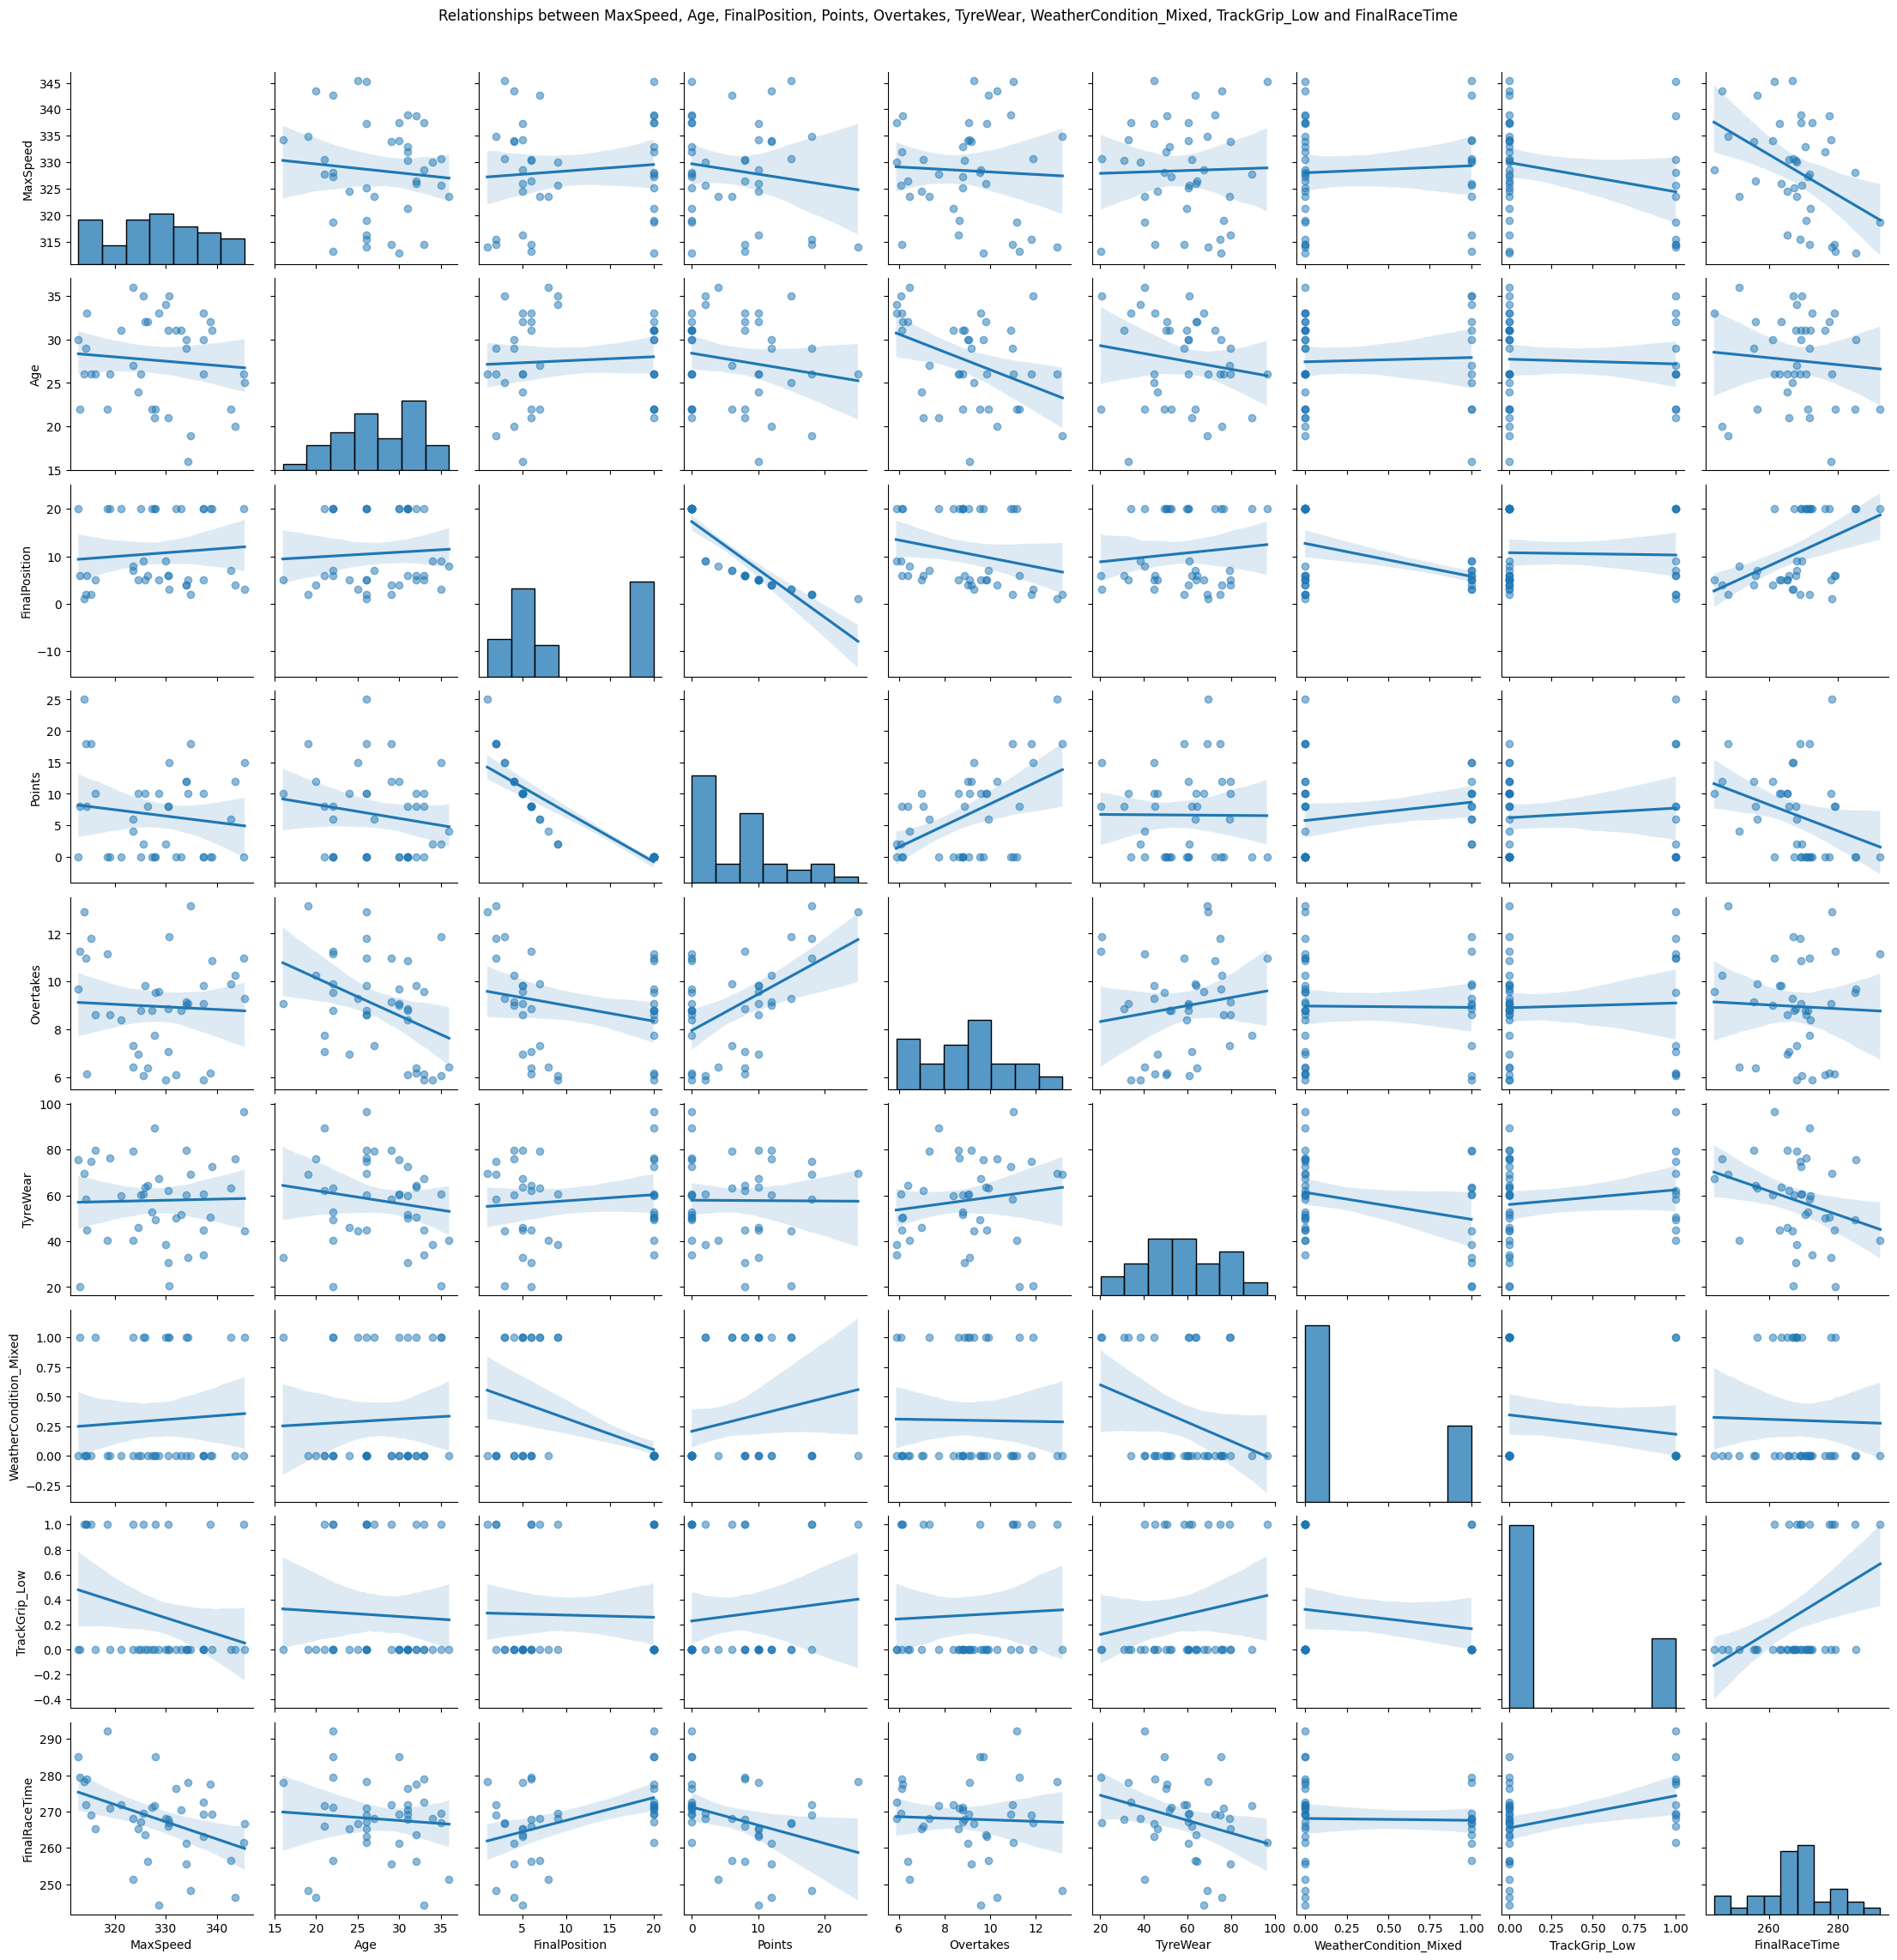

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Crear el gráfico de pares (pairplot)
sns.pairplot(circuit_data[features + [target]], kind='reg', plot_kws={'scatter_kws': {'alpha': 0.5}})
plt.suptitle(f'Relationships between {", ".join(features)} and {target}', y=1.02)
plt.show()



In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import io
from urllib.request import urlopen


# Agregar constante para la intersección
X_train_const = sm.add_constant(X_train_scaled)

# Ajustar el modelo de regresión con statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()

# Mostrar los p-values de cada coeficiente
print(model_sm.summary())


# # Añadiendo una constante (intercepto) a las variables independientes
# X = sm.add_constant(X)

# # Ajustando el modelo OLS (Ordinary Least Squares)
# model = sm.OLS(y, X).fit()

# # Mostrando el resumen del modelo
# print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          FinalRaceTime   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     29.53
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           2.52e-10
Time:                        23:01:33   Log-Likelihood:                -80.985
No. Observations:                  32   AIC:                             180.0
Df Residuals:                      23   BIC:                             193.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.6977      0.634    422.321      0.0

## Normalidad de los Residuos

- **Qué es**: Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo. Este supuesto indica que los residuos deben seguir una distribución normal, lo cual es importante para hacer inferencias estadísticas válidas.

- **Herramientas para verificar la normalidad**:

1. `Histograma de los residuos`
El histograma de los residuos muestra cómo se distribuyen estos errores. Si la distribución de los residuos se parece a una curva de campana (distribución normal), el supuesto se cumple.



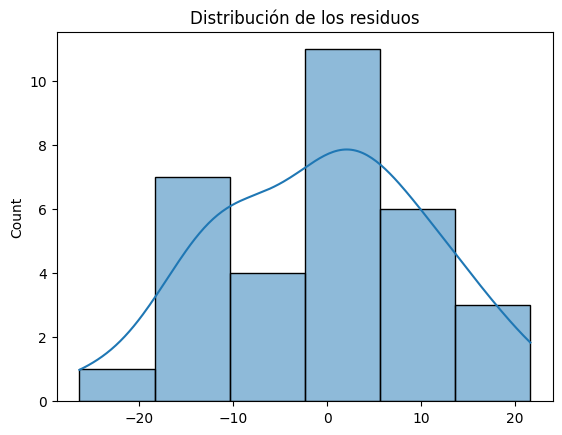

In [30]:

import statsmodels.api as sm
X = circuit_data[features]
y = circuit_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)


model = sm.OLS(y, X).fit()

residuals = y_train - model.predict(X)
sns.histplot(residuals, kde=True)
plt.title('Distribución de los residuos')
plt.show()

Kolmogorov-Smirnov Test: p-value = 0.9939
Anderson-Darling Test: statistic = 0.2172
Critical values: [0.523 0.596 0.715 0.834 0.992]
Significance levels: [15.  10.   5.   2.5  1. ]
Jarque-Bera Test: p-value = 0.9074


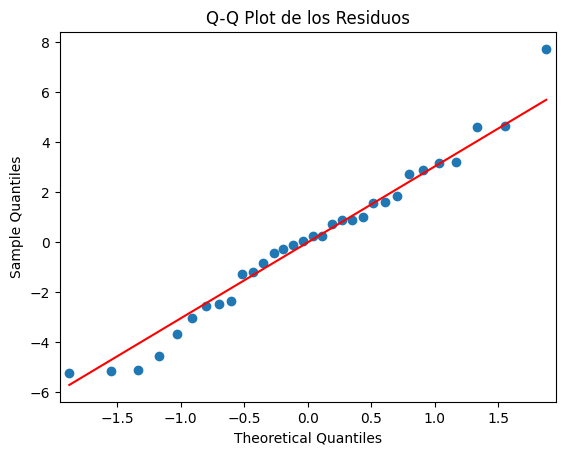

In [31]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supongamos que 'residuals' es un array con los residuos del modelo
residuals = model_sm.resid  # Extrae los residuos del modelo Statsmodels

# 1. Prueba de Kolmogorov-Smirnov
ks_stat, ks_p_value = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f"Kolmogorov-Smirnov Test: p-value = {ks_p_value:.4f}")

# 2. Prueba de Anderson-Darling
anderson_result = stats.anderson(residuals, dist='norm')
print(f"Anderson-Darling Test: statistic = {anderson_result.statistic:.4f}")
print("Critical values:", anderson_result.critical_values)
print("Significance levels:", anderson_result.significance_level)

# 3. Prueba de Jarque-Bera
jb_stat, jb_p_value = stats.jarque_bera(residuals)
print(f"Jarque-Bera Test: p-value = {jb_p_value:.4f}")

# 4. Gráfico Q-Q Plot
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot de los Residuos")
plt.show()


**1. Kolmogorov-Smirnov Test**: **p-value = 0.9939**

- **p-value > 0.05**: No rechazamos la hipótesis nula de normalidad. Los residuos probablemente siguen una distribución normal.

**2. Anderson-Darling Tes**t: **statistic = 0.2172**

- Al comparar con los valores críticos:
  - El estadístico (0.2172) es mucho menor que el valor crítico en el nivel del 1% (0.992). Esto significa que no se rechaza la hipótesis de normalidad en el nivel de significancia de 1%.
- Los residuos parecen normales según esta prueba.

**Jarque-Bera Test: p-value = 0.9074**

- **p-value > 0.05**: No rechazamos la hipótesis nula, lo que indica que los residuos tienen una distribución normal en cuanto a asimetría y curtosis.

## Homocedasticidad

- **Qué es**: Este supuesto afirma que la varianza de los residuos debe ser constante para todos los valores de las predicciones. Si la varianza de los residuos cambia (es decir, es más grande para ciertos valores de la variable dependiente), se dice que hay heterocedasticidad.

- **Herramientas para verificar la homocedasticidad**:

1. `Gráfico de Predicciones vs Residuos`
En este gráfico se comparan los residuos con las predicciones generadas por el modelo.Interpretación: Si los residuos se dispersan de manera uniforme alrededor de cero en todo el rango de predicciones (sin formar patrones), el supuesto de homocedasticidad se cumple. Si los residuos se agrupan o dispersan de manera no uniforme, puede haber heterocedasticidad.

2. `Test de Breusch-Pagan`
Este test estadístico evalúa la existencia de heterocedasticidad en el modelo.
Interpretación del p-value:
Si el p-value es mayor que 0.05, el modelo no presenta heterocedasticidad, lo que significa que se cumple el supuesto de homocedasticidad.
Si el p-value es menor que 0.05, indica heterocedasticidad, lo cual es problemático para el modelo.

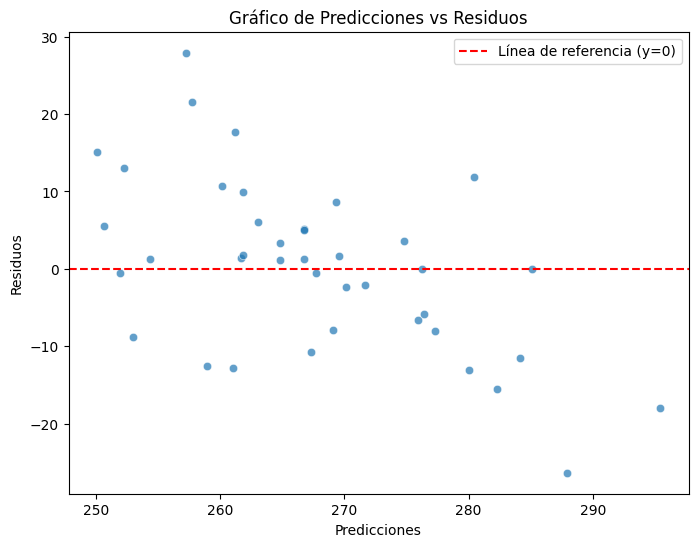


Breusch-Pagan Test Results:
LM Statistic: 4.5902
LM-Test p-value: 0.8003
F-Statistic: 0.5023
F-Test p-value: 0.8451

✅ No hay evidencia de heterocedasticidad. Se cumple el supuesto de homocedasticidad.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.api import het_breuschpagan

# Calcular predicciones del modelo
y_pred = model.predict(X)

# Calcular los residuos
residuals = model.resid

# 📊 1. Gráfico de Predicciones vs Residuos
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', label="Línea de referencia (y=0)")
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Predicciones vs Residuos')
plt.legend()
plt.show()

# 📊 2. Test de Breusch-Pagan
# Agregar una constante a las variables independientes (X)
X_const = sm.add_constant(X)

# Realizar el test de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X_const)

# Resultados
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
results = dict(zip(labels, bp_test))

print("\nBreusch-Pagan Test Results:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

# Interpretación del p-value
if results['LM-Test p-value'] > 0.05:
    print("\n✅ No hay evidencia de heterocedasticidad. Se cumple el supuesto de homocedasticidad.")
else:
    print("\n❌ Hay heterocedasticidad en el modelo. Puede ser necesario aplicar correcciones.")

### Explicación de los resultados:

* **LM Statistic** : Este es el valor de la estadística del test. Cuanto mayor es este valor, más probable es que exista heterocedasticidad. En este caso, el valor es  **10.4573** , pero lo que realmente importa es el  **p-value** .
* **LM-Test p-value** : El p-value del test nos dice si podemos rechazar o no la hipótesis nula de homocedasticidad. Si es  **mayor que 0.05** , no hay suficiente evidencia para rechazar la hipótesis de homocedasticidad, lo que indica que los residuos tienen una varianza constante. En este caso,  **0.2344 > 0.05** , por lo tanto, no se rechaza la hipótesis de homocedasticidad.
* **F-Statistic y F-Test p-value** : Estas son versiones alternativas de la estadística de la prueba, pero la interpretación es similar. El **F-Test p-value** también es  **0.2354** , mayor que 0.05, lo que apoya la conclusión de que no hay heterocedasticidad.


El modelo cumple el supuesto de `homocedasticidad`, lo que significa que la varianza de los residuos es constante a lo largo de las predicciones del modelo. Esto es una buena señal, ya que la `homocedasticidad`es uno de los supuestos clave para la validez de los resultados de un modelo de regresión lineal.

## No Multiconealidad

- **Qué es**: La multicolinealidad se refiere a una alta correlación entre las variables independientes. Si las variables independientes están altamente correlacionadas, puede ser difícil distinguir sus efectos individuales sobre la variable dependiente.

- **Herramientas para verificar la multicolinealidad**:

1. `Matriz de correlación`
Se calcula la correlación entre todas las variables independientes. Correlaciones altas (por ejemplo, mayores a 0.8 o 0.9) pueden indicar que las variables están altamente correlacionadas, lo cual puede causar problemas en la interpretación del modelo.
Interpretación: Si las variables tienen correlaciones muy altas entre sí, se debería considerar eliminar o combinar algunas variables para reducir la multicolinealidad.


2. `Variance Inflation Factor (VIF)`
El VIF mide cuánto se ha inflado la varianza de los coeficientes debido a la colinealidad entre las variables independientes.
Interpretación:
Un VIF mayor a 10 indica una alta multicolinealidad y sugiere que la variable puede estar causando un problema en el modelo.
Un VIF bajo (por debajo de 5) sugiere que la multicolinealidad no es un problema.

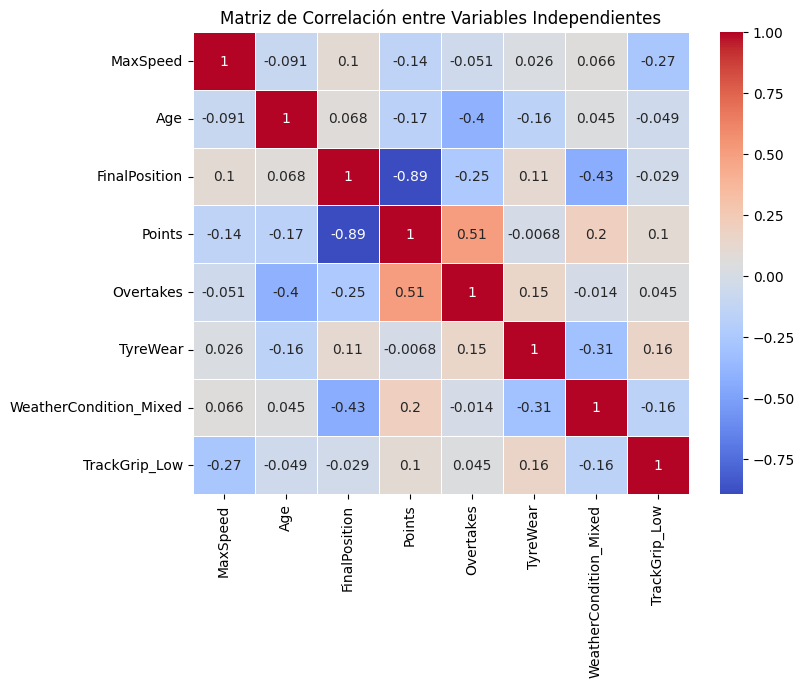


📊 Variance Inflation Factor (VIF) para cada variable independiente:
                 Variable         VIF
0                MaxSpeed  108.730209
1                     Age   34.901306
2           FinalPosition   32.908452
3                  Points   23.776109
4               Overtakes   50.476124
5                TyreWear   13.623042
6  WeatherCondition_Mixed    2.491092
7           TrackGrip_Low    1.479622

❌ Hay variables con alta multicolinealidad (VIF > 10). Considera eliminarlas o combinarlas.


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 📌 1. Matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Independientes')
plt.show()

# 📌 2. Calcular el Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print("\n📊 Variance Inflation Factor (VIF) para cada variable independiente:")
print(vif_data)

# Interpretación del VIF
high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print("\n❌ Hay variables con alta multicolinealidad (VIF > 10). Considera eliminarlas o combinarlas.")
else:
    print("\n✅ No hay evidencia de alta multicolinealidad. El modelo es estable.")




El análisis de supuestos es esencial para validar la calidad del modelo de regresión y asegurar que las inferencias sean confiables. Como vemos se cumple todos los supuestos excepto el supuesto de no multicolinealidad lo que nos sugiere que debamos refactorizar las variables o usar otros enfoques.

FinalRaceTime = 267.70 + (-3.86 * MaxSpeed) + (5.87 * FinalPosition) + (-4.84 * TyreWear) + (2.54 * WeatherCondition_Mixed) + (4.84 * TrackGrip_Low)
0.2560


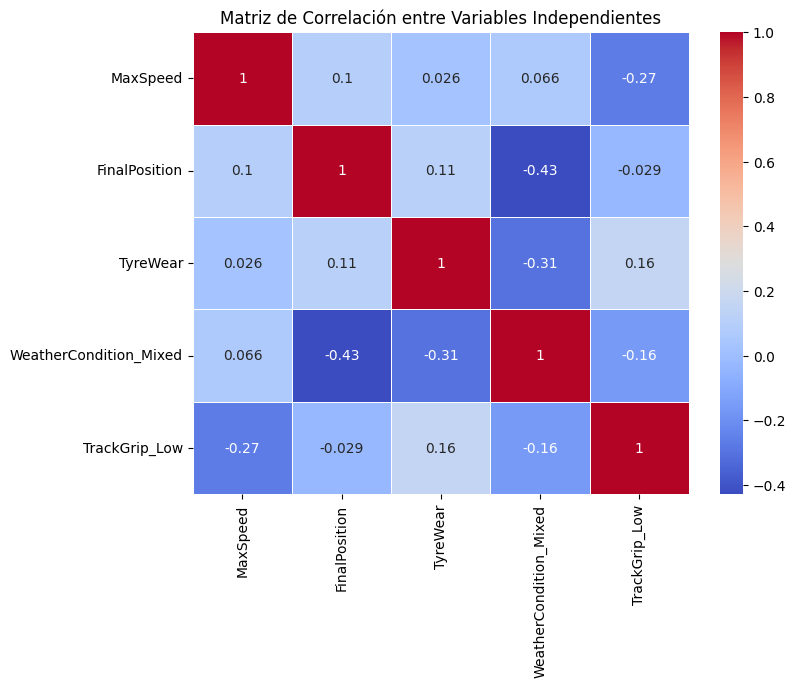


📊 Variance Inflation Factor (VIF) para cada variable independiente:
                 Variable        VIF
0                MaxSpeed  19.009044
1           FinalPosition   3.803297
2                TyreWear  13.192665
3  WeatherCondition_Mixed   1.966864
4           TrackGrip_Low   1.442999

❌ Hay variables con alta multicolinealidad (VIF > 10). Considera eliminarlas o combinarlas.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the data
data = pd.read_csv("formula1_interlagos_df_final.csv")

# Select relevant features and target
features = [ 'FinalPosition',  'TyreWear', 'WeatherCondition_Mixed', 'TrackGrip_Low']
target = 'FinalRaceTime'


circuit_data = data[data['Circuit'] == "Melbourne"].copy()

X = circuit_data[features]
y = circuit_data[target]

    # Handle missing values
X = X.dropna()
y = y[X.index]



    # Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

    # Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_
intercept = model.intercept_

#print("\nEquation of the hyperplane:")
equation = f"FinalRaceTime = {intercept:.2f}"
for feature, coef in zip(features, coefficients):
    equation += f" + ({coef:.2f} * {feature})"
print(equation)

# Calculate R-squared
r_squared = model.score(X_test_scaled, y_test)




print(f"{r_squared:.4f}")



# 📌 1. Matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Independientes')
plt.show()

# 📌 2. Calcular el Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Mostrar los resultados del VIF
print("\n📊 Variance Inflation Factor (VIF) para cada variable independiente:")
print(vif_data)

# Interpretación del VIF
high_vif = vif_data[vif_data["VIF"] > 10]
if not high_vif.empty:
    print("\n❌ Hay variables con alta multicolinealidad (VIF > 10). Considera eliminarlas o combinarlas.")
else:
    print("\n✅ No hay evidencia de alta multicolinealidad. El modelo es estable.")


